In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas.plotting import scatter_matrix

In [ ]:
df=pd.read_csv("/content/test_dataset.csv")

In [ ]:
df.head()

,LTE/5g Category,Time,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone
0,15,17,0.001000,100,0,1,1,0,1,0,0,0,0,0,0,0
1,14,18,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0
2,11,7,0.001000,50,1,0,1,0,0,0,1,0,0,0,0,0
3,20,14,0.001000,50,1,0,1,0,0,0,1,0,0,0,0,0
4,2,22,0.001000,50,0,1,0,1,1,0,0,0,0,0,0,0


In [ ]:
df.shape

(31584, 16)

In [ ]:
df.dtypes

,0
LTE/5g Category,int64
Time,int64
Packet Loss Rate,float64
Packet delay,int64
IoT,int64
LTE/5G,int64
GBR,int64
Non-GBR,int64
AR/VR/Gaming,int64
Healthcare,int64


In [ ]:
df.isnull().sum()

,0
LTE/5g Category,0
Time,0
Packet Loss Rate,0
Packet delay,0
IoT,0
LTE/5G,0
GBR,0
Non-GBR,0
AR/VR/Gaming,0
Healthcare,0


In [ ]:
df.describe()

,LTE/5g Category,Time,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone
count,31584.000000,31584.000000,31584.000000,31584.000000,31584.000000,31584.000000,31584.000000,31584.000000,31584.000000,31584.000000,31584.000000,31584.000000,31584.000000,31584.000000,31584.000000,31584.000000
mean,10.961563,11.523905,0.003102,114.490723,0.468085,0.531915,0.441806,0.558194,0.106478,0.059081,0.117939,0.059144,0.057307,0.116325,0.058289,0.425437
std,6.074935,6.928669,0.004353,106.324678,0.498988,0.498988,0.496610,0.496610,0.308453,0.235779,0.322542,0.235898,0.232433,0.320619,0.234293,0.494417
min,1.000000,0.000000,0.000001,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,5.000000,0.000001,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11.000000,12.000000,0.001000,75.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16.000000,18.000000,0.010000,150.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,22.000000,23.000000,0.010000,300.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
def reduce_mem_usage(train):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = train.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in train.columns:
        col_type = train[col].dtype

        if col_type != object:
            c_min = train[col].min()
            c_max = train[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    train[col] = train[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    train[col] = train[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    train[col] = train[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    train[col] = train[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    train[col] = train[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    train[col] = train[col].astype(np.float32)
                else:
                    train[col] = train[col].astype(np.float64)
        else:
            train[col] = train[col].astype('object')

    end_mem = train.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return train

In [ ]:
df= reduce_mem_usage(df)
df.info()

Memory usage of dataframe is 3.86 MB
Memory usage after optimization is: 0.54 MB
Decreased by 85.9%
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31584 entries, 0 to 31583
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   LTE/5g Category       31584 non-null  int8   
 1   Time                  31584 non-null  int8   
 2   Packet Loss Rate      31584 non-null  float16
 3   Packet delay          31584 non-null  int16  
 4   IoT                   31584 non-null  int8   
 5   LTE/5G                31584 non-null  int8   
 6   GBR                   31584 non-null  int8   
 7   Non-GBR               31584 non-null  int8   
 8   AR/VR/Gaming          31584 non-null  int8   
 9   Healthcare            31584 non-null  int8   
 10  Industry 4.0          31584 non-null  int8   
 11  IoT Devices           31584 non-null  int8   
 12  Public Safety         31584 non-null  int8   
 13  Smart City & Home    

In [ ]:
import re
df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,LTE5gCategory,Time,PacketLossRate,Packetdelay,IoT,LTE5G,GBR,NonGBR,ARVRGaming,Healthcare,Industry40,IoTDevices,PublicSafety,SmartCityHome,SmartTransportation,Smartphone
0,15,17,0.001000,100,0,1,1,0,1,0,0,0,0,0,0,0
1,14,18,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0
2,11,7,0.001000,50,1,0,1,0,0,0,1,0,0,0,0,0
3,20,14,0.001000,50,1,0,1,0,0,0,1,0,0,0,0,0
4,2,22,0.001000,50,0,1,0,1,1,0,0,0,0,0,0,0


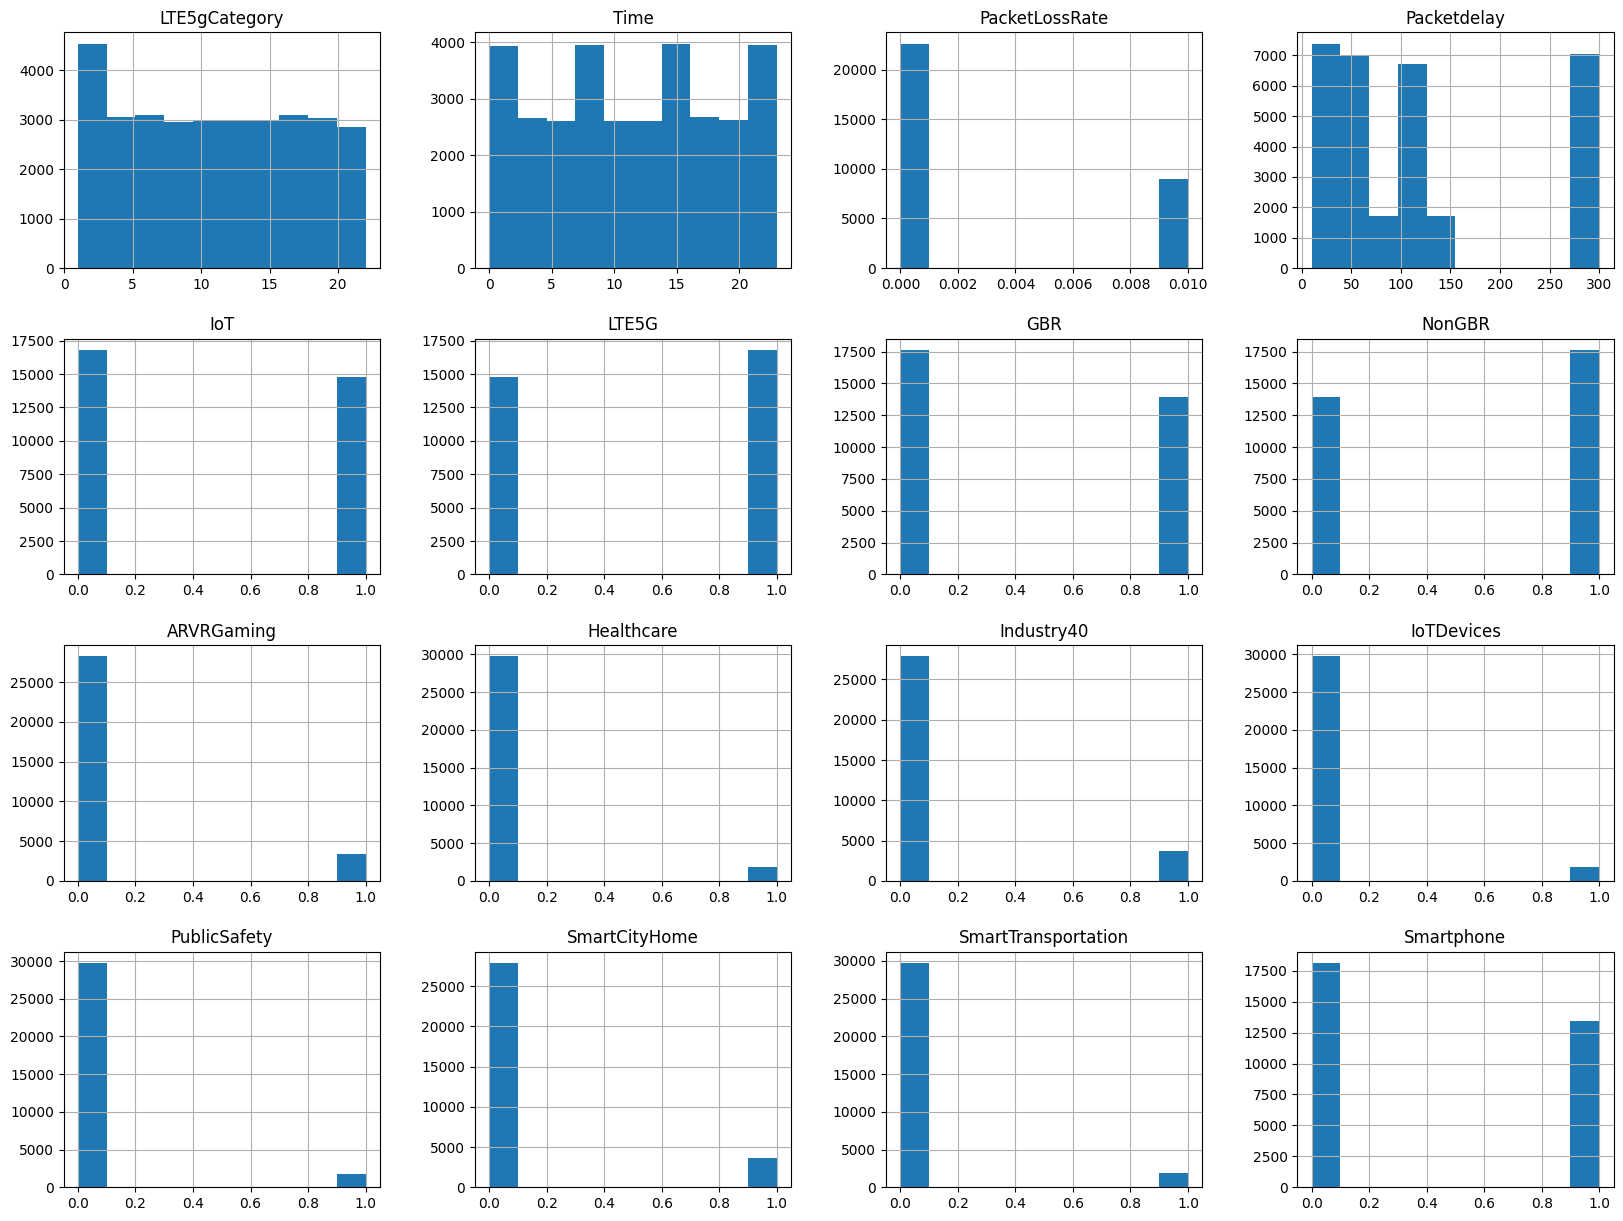

In [ ]:
df.hist(bins=10, figsize=(20,15))
plt.show()

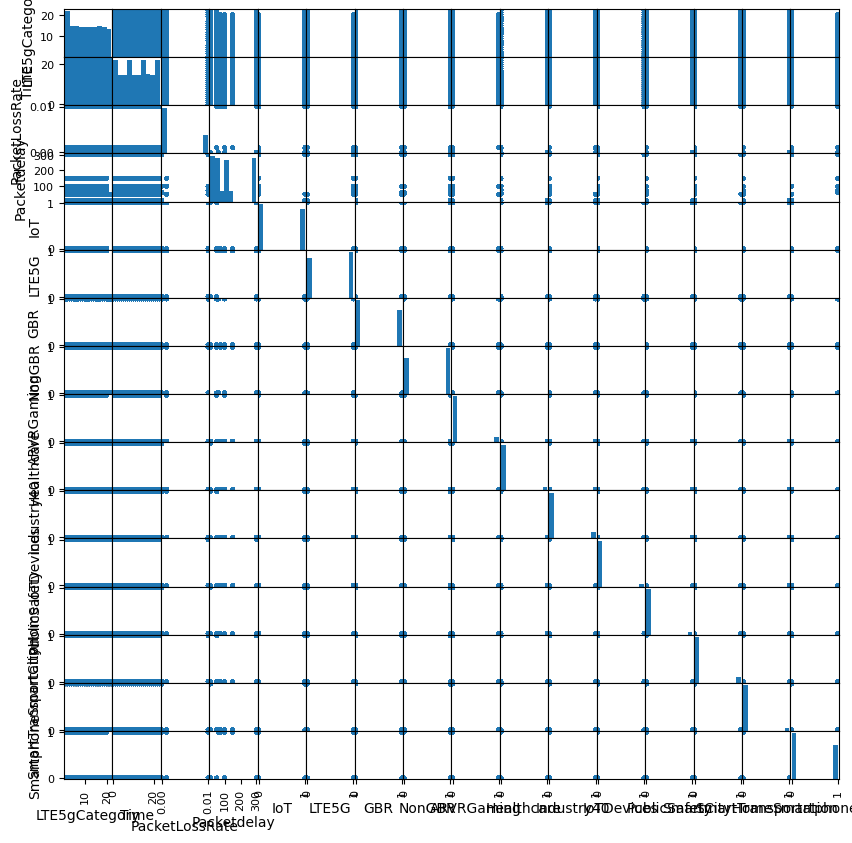

In [ ]:
pd.plotting.scatter_matrix(df, figsize=(10,10))
plt.show()

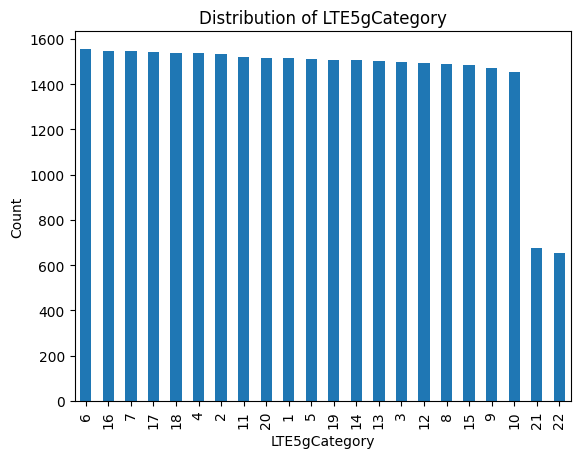

In [ ]:
# Plot the distribution of LTE5gCategory
df['LTE5gCategory'].value_counts().plot(kind='bar')
plt.title('Distribution of LTE5gCategory')
plt.xlabel('LTE5gCategory')
plt.ylabel('Count')
plt.show()


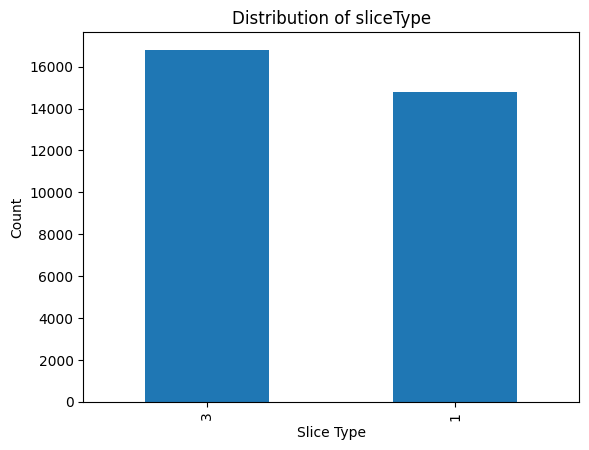

In [ ]:
# Create a new column based on some condition
df['sliceType'] = np.where(df['IoT'] == 1, 1,
                           np.where(df['Healthcare'] == 1, 2, 3))

# Plot the distribution of the newly created sliceType column
df['sliceType'].value_counts().plot(kind='bar')
plt.title('Distribution of sliceType')
plt.xlabel('Slice Type')
plt.ylabel('Count')
plt.show()


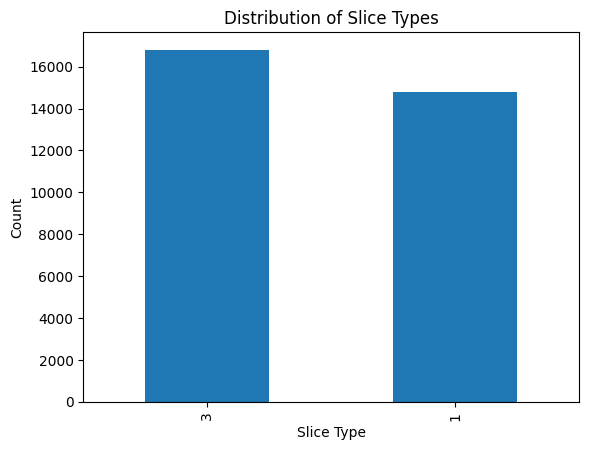

In [ ]:
df['sliceType'].value_counts().plot(kind='bar')
plt.title('Distribution of Slice Types')
plt.xlabel('Slice Type')
plt.ylabel('Count')
plt.show()


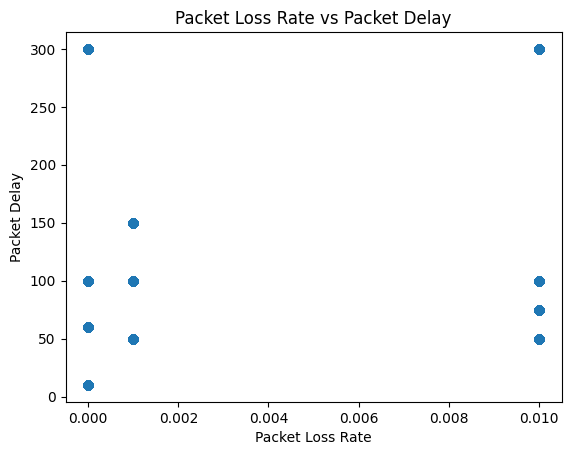

In [ ]:
plt.scatter(df['PacketLossRate'], df['Packetdelay'])
plt.title('Packet Loss Rate vs Packet Delay')
plt.xlabel('Packet Loss Rate')
plt.ylabel('Packet Delay')
plt.show()


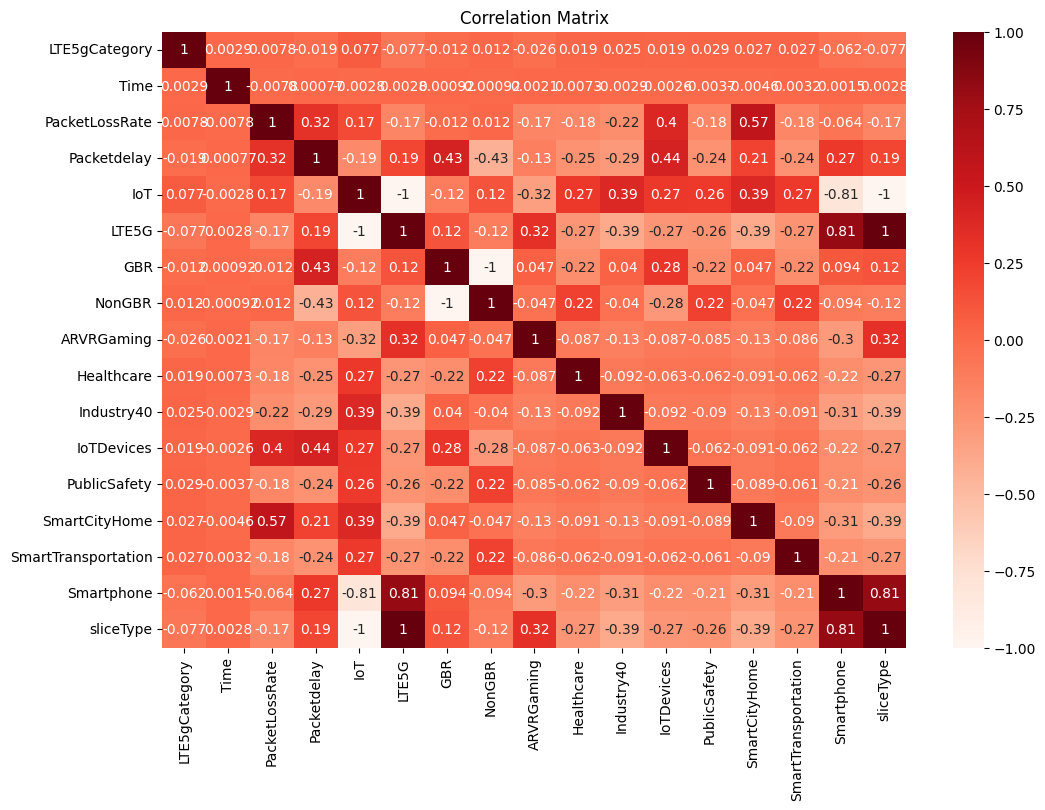

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=plt.cm.Reds)
plt.title('Correlation Matrix')
plt.show()


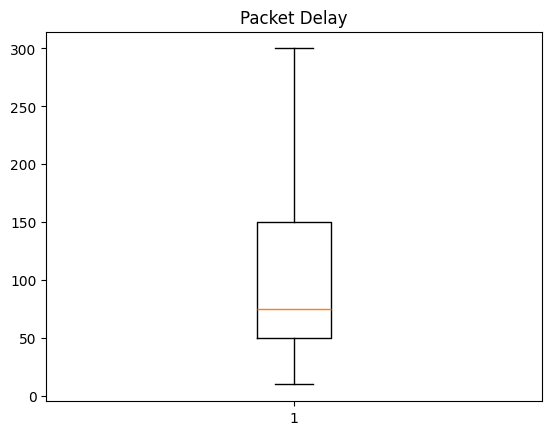

In [ ]:
plt.boxplot(df['Packetdelay'])
plt.title('Packet Delay')
plt.show()


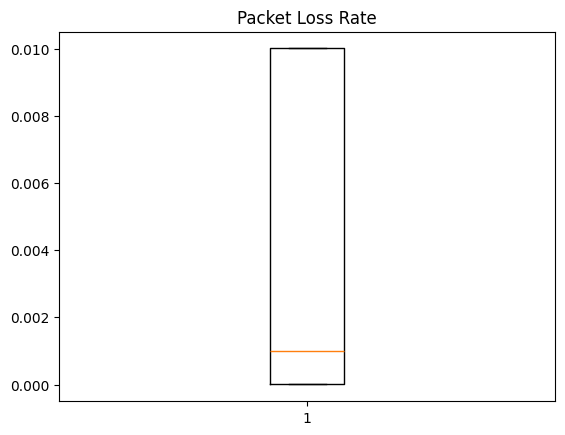

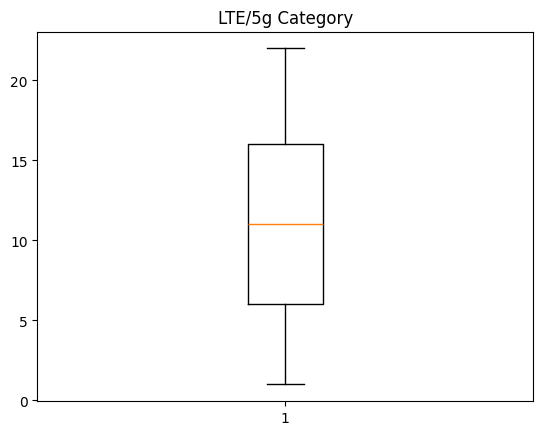

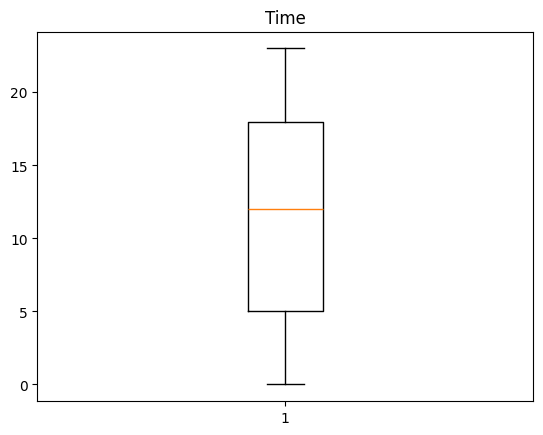

In [ ]:
plt.boxplot(df['PacketLossRate'])
plt.title('Packet Loss Rate')
plt.show()

# Boxplot for LTE/5g Category
plt.boxplot(df['LTE5gCategory'])
plt.title('LTE/5g Category')
plt.show()

# Boxplot for Time
plt.boxplot(df['Time'])
plt.title('Time')
plt.show()

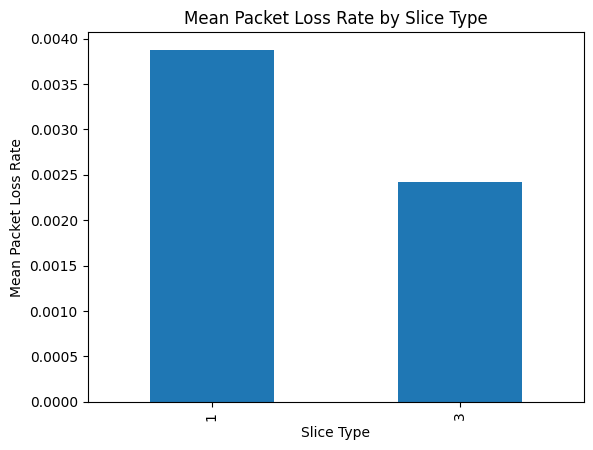

In [ ]:
grouped = df.groupby('sliceType')['PacketLossRate'].mean()
grouped.plot(kind='bar')
plt.title('Mean Packet Loss Rate by Slice Type')
plt.xlabel('Slice Type')
plt.ylabel('Mean Packet Loss Rate')
plt.show()


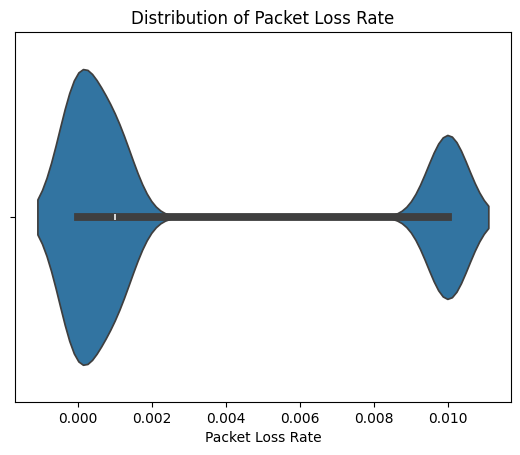

In [ ]:
sns.violinplot(x=df['PacketLossRate'])
plt.title('Distribution of Packet Loss Rate')
plt.xlabel('Packet Loss Rate')
plt.show()


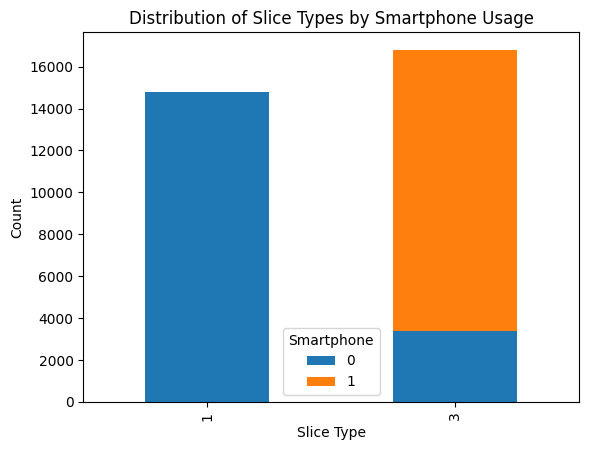

In [ ]:
grouped = df.groupby(['sliceType', 'Smartphone']).size().unstack()
grouped.plot(kind='bar', stacked=True)
plt.title('Distribution of Slice Types by Smartphone Usage')
plt.xlabel('Slice Type')
plt.ylabel('Count')
plt.show()


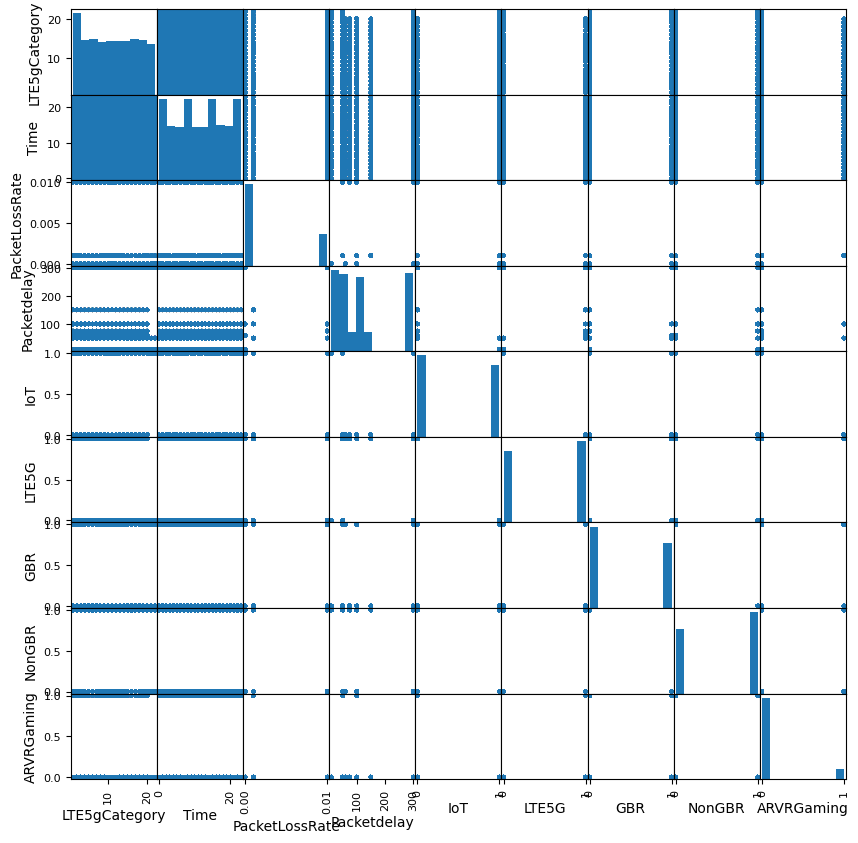

In [ ]:


numerical = df.drop(['sliceType', 'Healthcare', 'Industry40', 'IoTDevices', 'PublicSafety', 'SmartCityHome', 'SmartTransportation', 'Smartphone'], axis=1)
scatter_matrix(numerical, figsize=(10, 10))
plt.show()

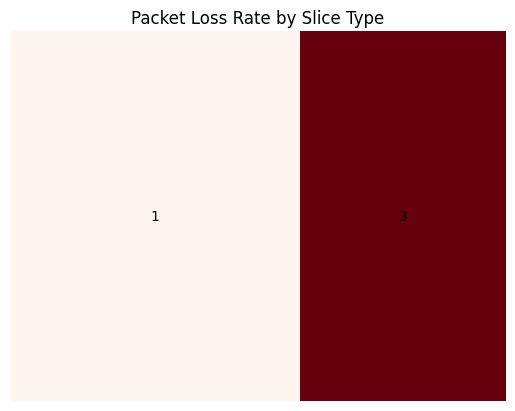

In [ ]:
!pip install squarify
import squarify
import matplotlib.pyplot as plt
import numpy as np


grouped = df.groupby('sliceType')['PacketLossRate'].sum()
squarify.plot(sizes=grouped.values, label=grouped.index, color=plt.cm.Reds(np.linspace(0, 1, len(grouped))))
plt.title('Packet Loss Rate by Slice Type')
plt.axis('off')
plt.show()

In [ ]:
!pip install autoviz


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.9/161.9 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 53.0 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.4
    Uninstalling xgboost-2.1.4:
      Successfully uninstalled xgboost-2.1.4


Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Shape of your Data Set loaded: (31584, 17)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  12
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number 

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
LTE5gCategory,int8,0.000000,0,1.000000,22.000000,No issue
Time,int8,0.000000,0,0.000000,23.000000,No issue
PacketLossRate,float16,0.000000,0,0.000001,0.010002,No issue
Packetdelay,int16,0.000000,0,10.000000,300.000000,No issue
IoT,int8,0.000000,0,0.000000,1.000000,No issue
LTE5G,int8,0.000000,0,0.000000,1.000000,No issue
GBR,int8,0.000000,0,0.000000,1.000000,No issue
NonGBR,int8,0.000000,0,0.000000,1.000000,No issue
ARVRGaming,int8,0.000000,0,0.000000,1.000000,No issue
Healthcare,int8,0.000000,0,0.000000,1.000000,No issue


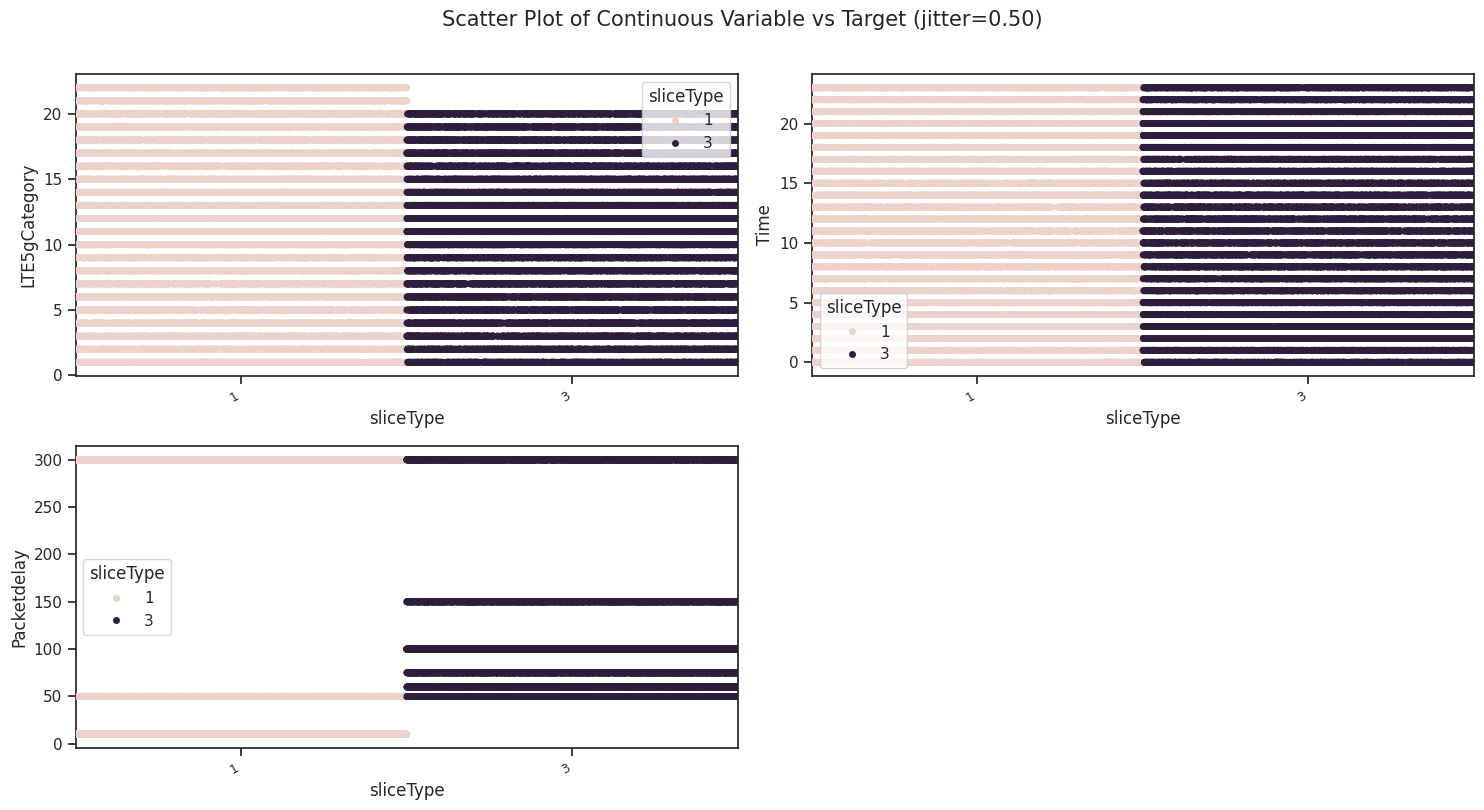

Total Number of Scatter Plots = 6


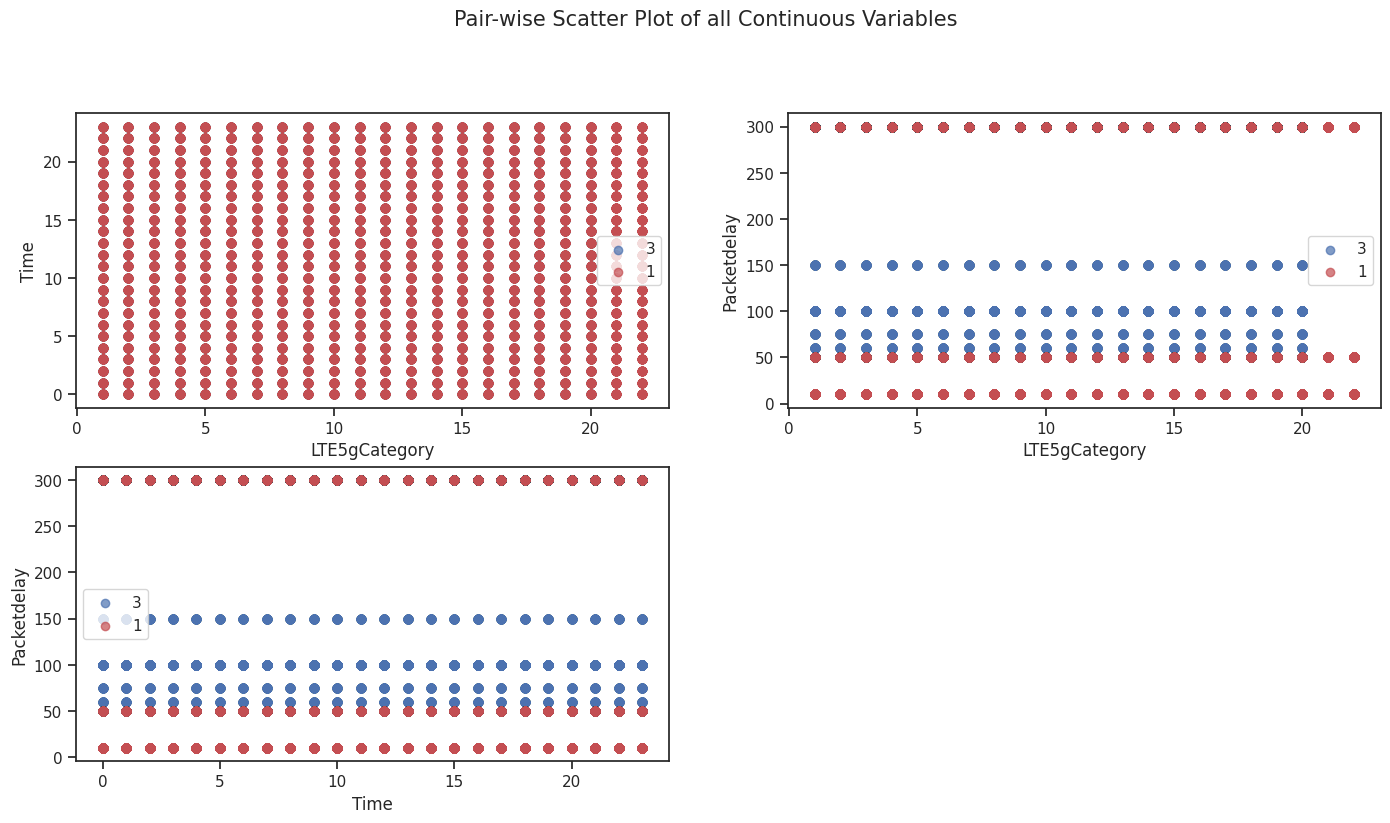

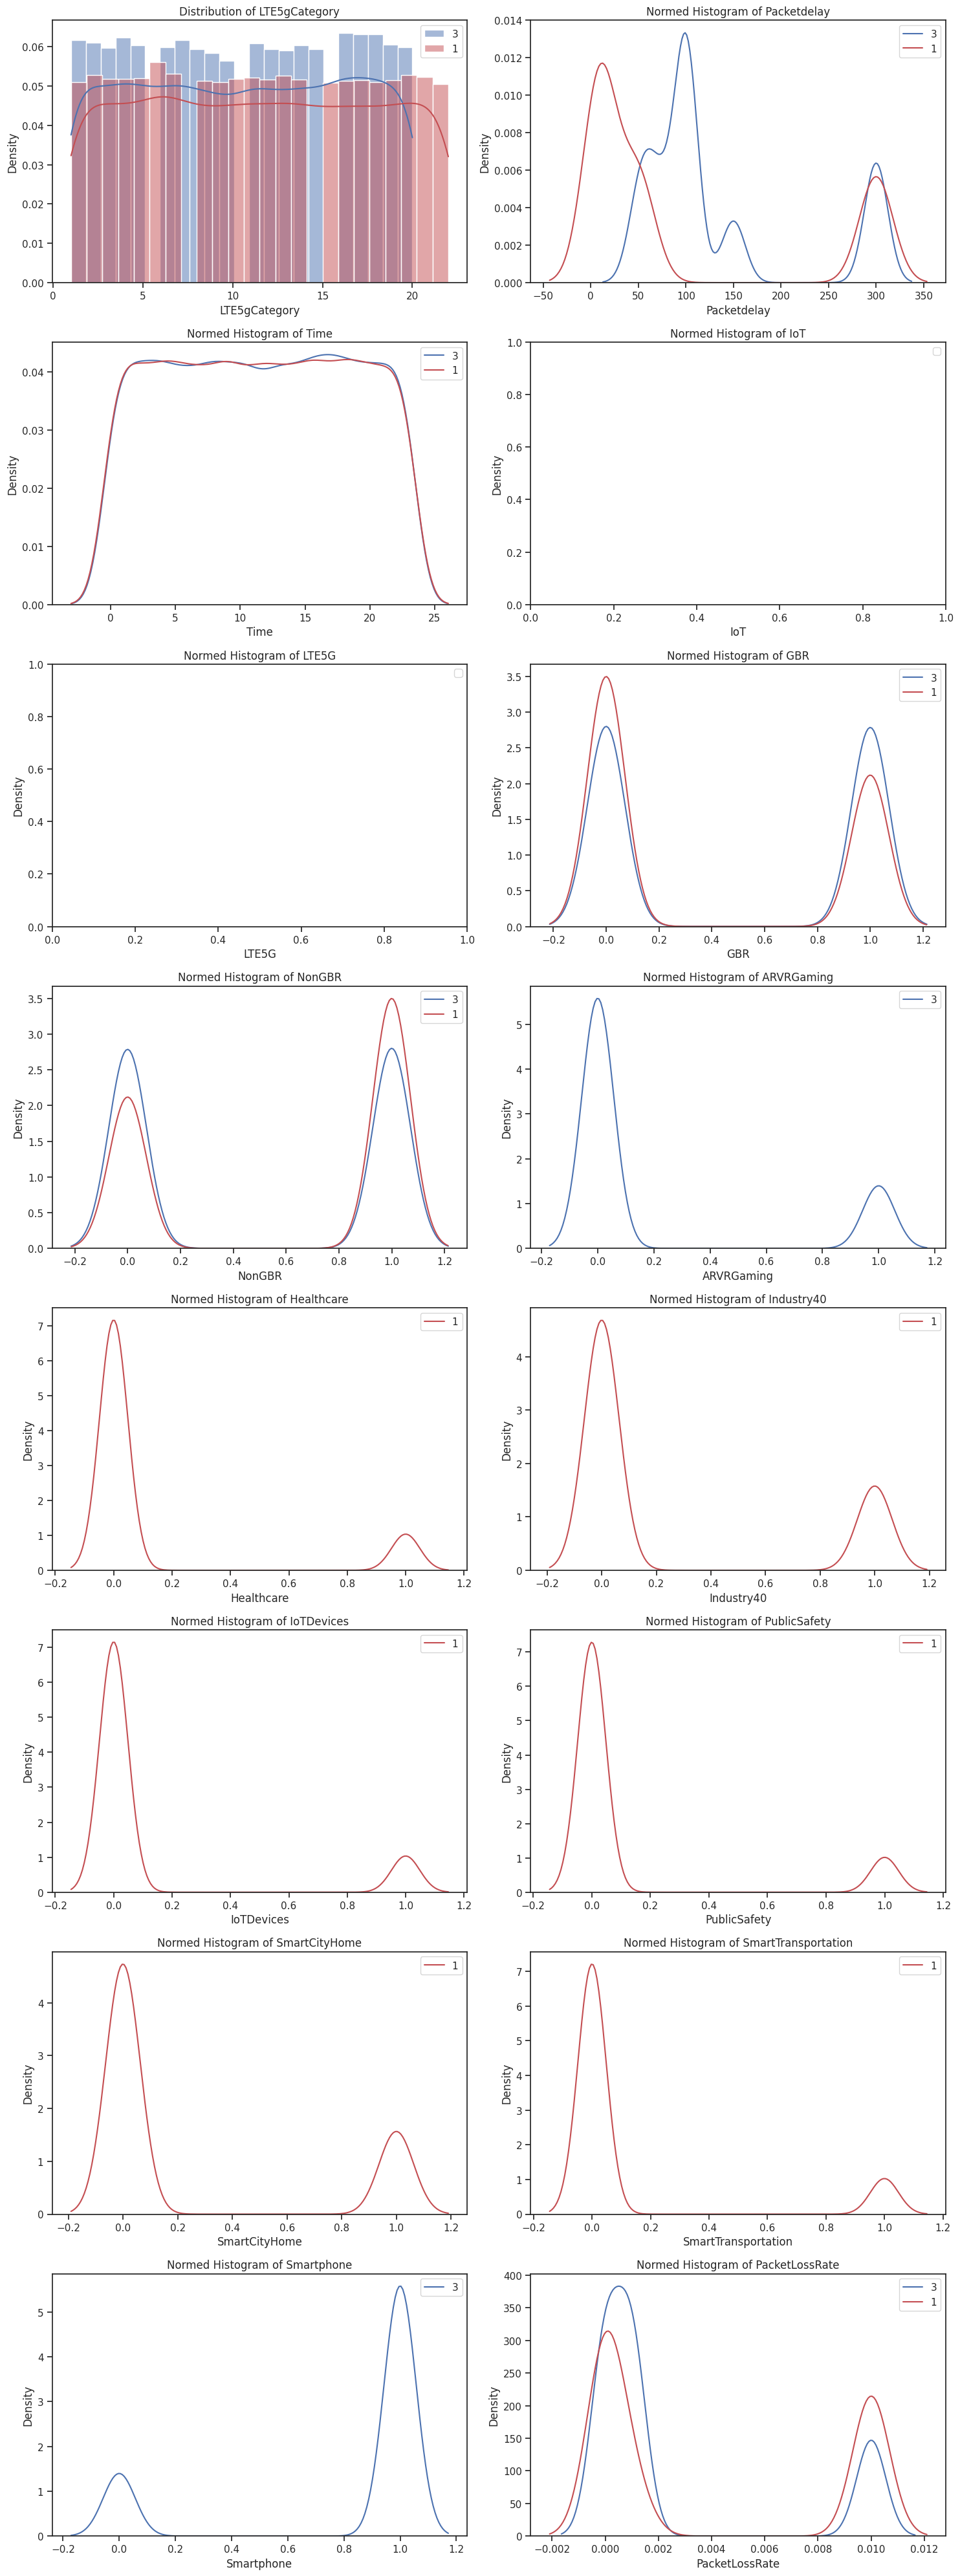

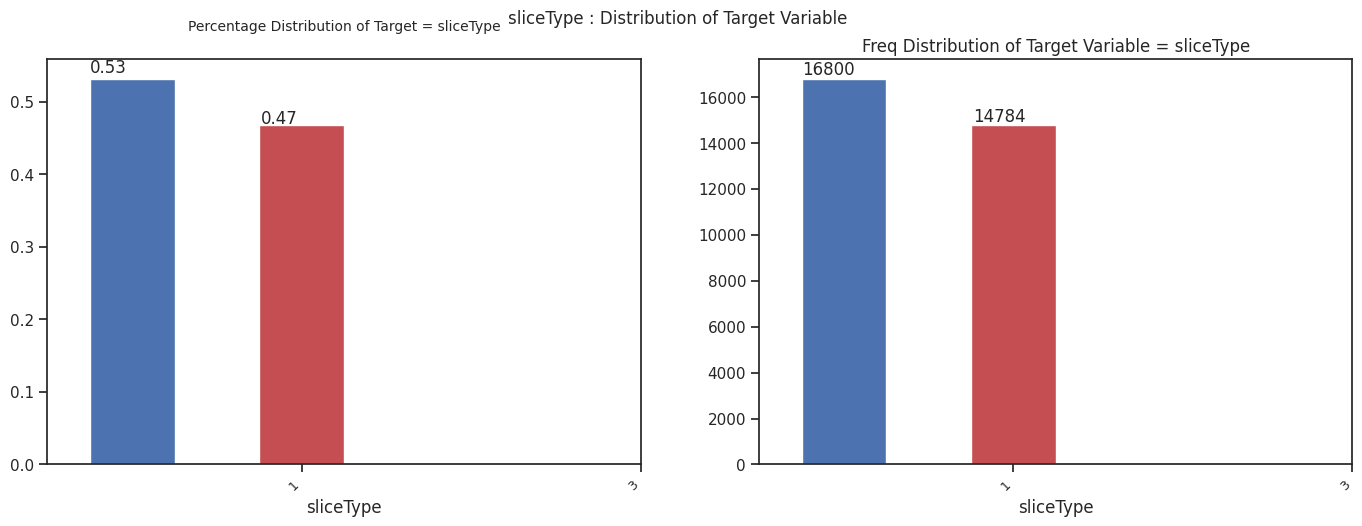

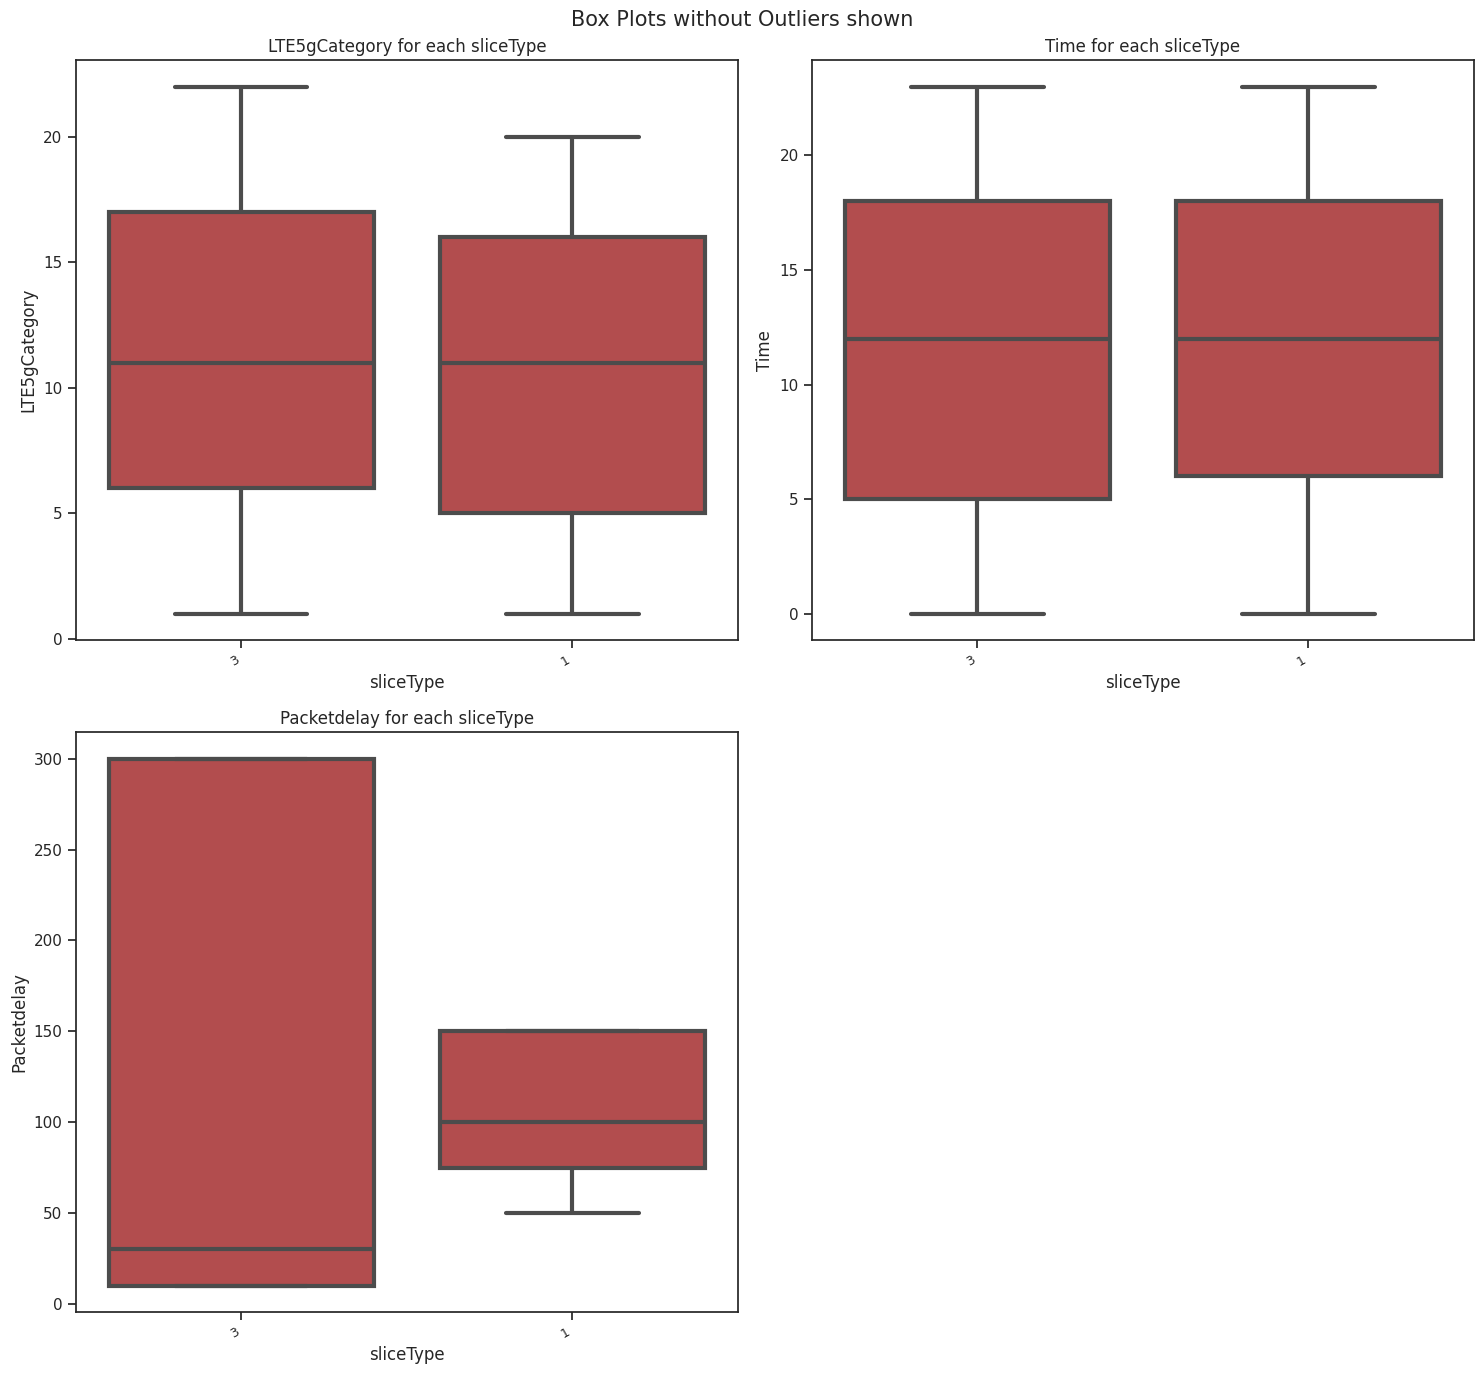

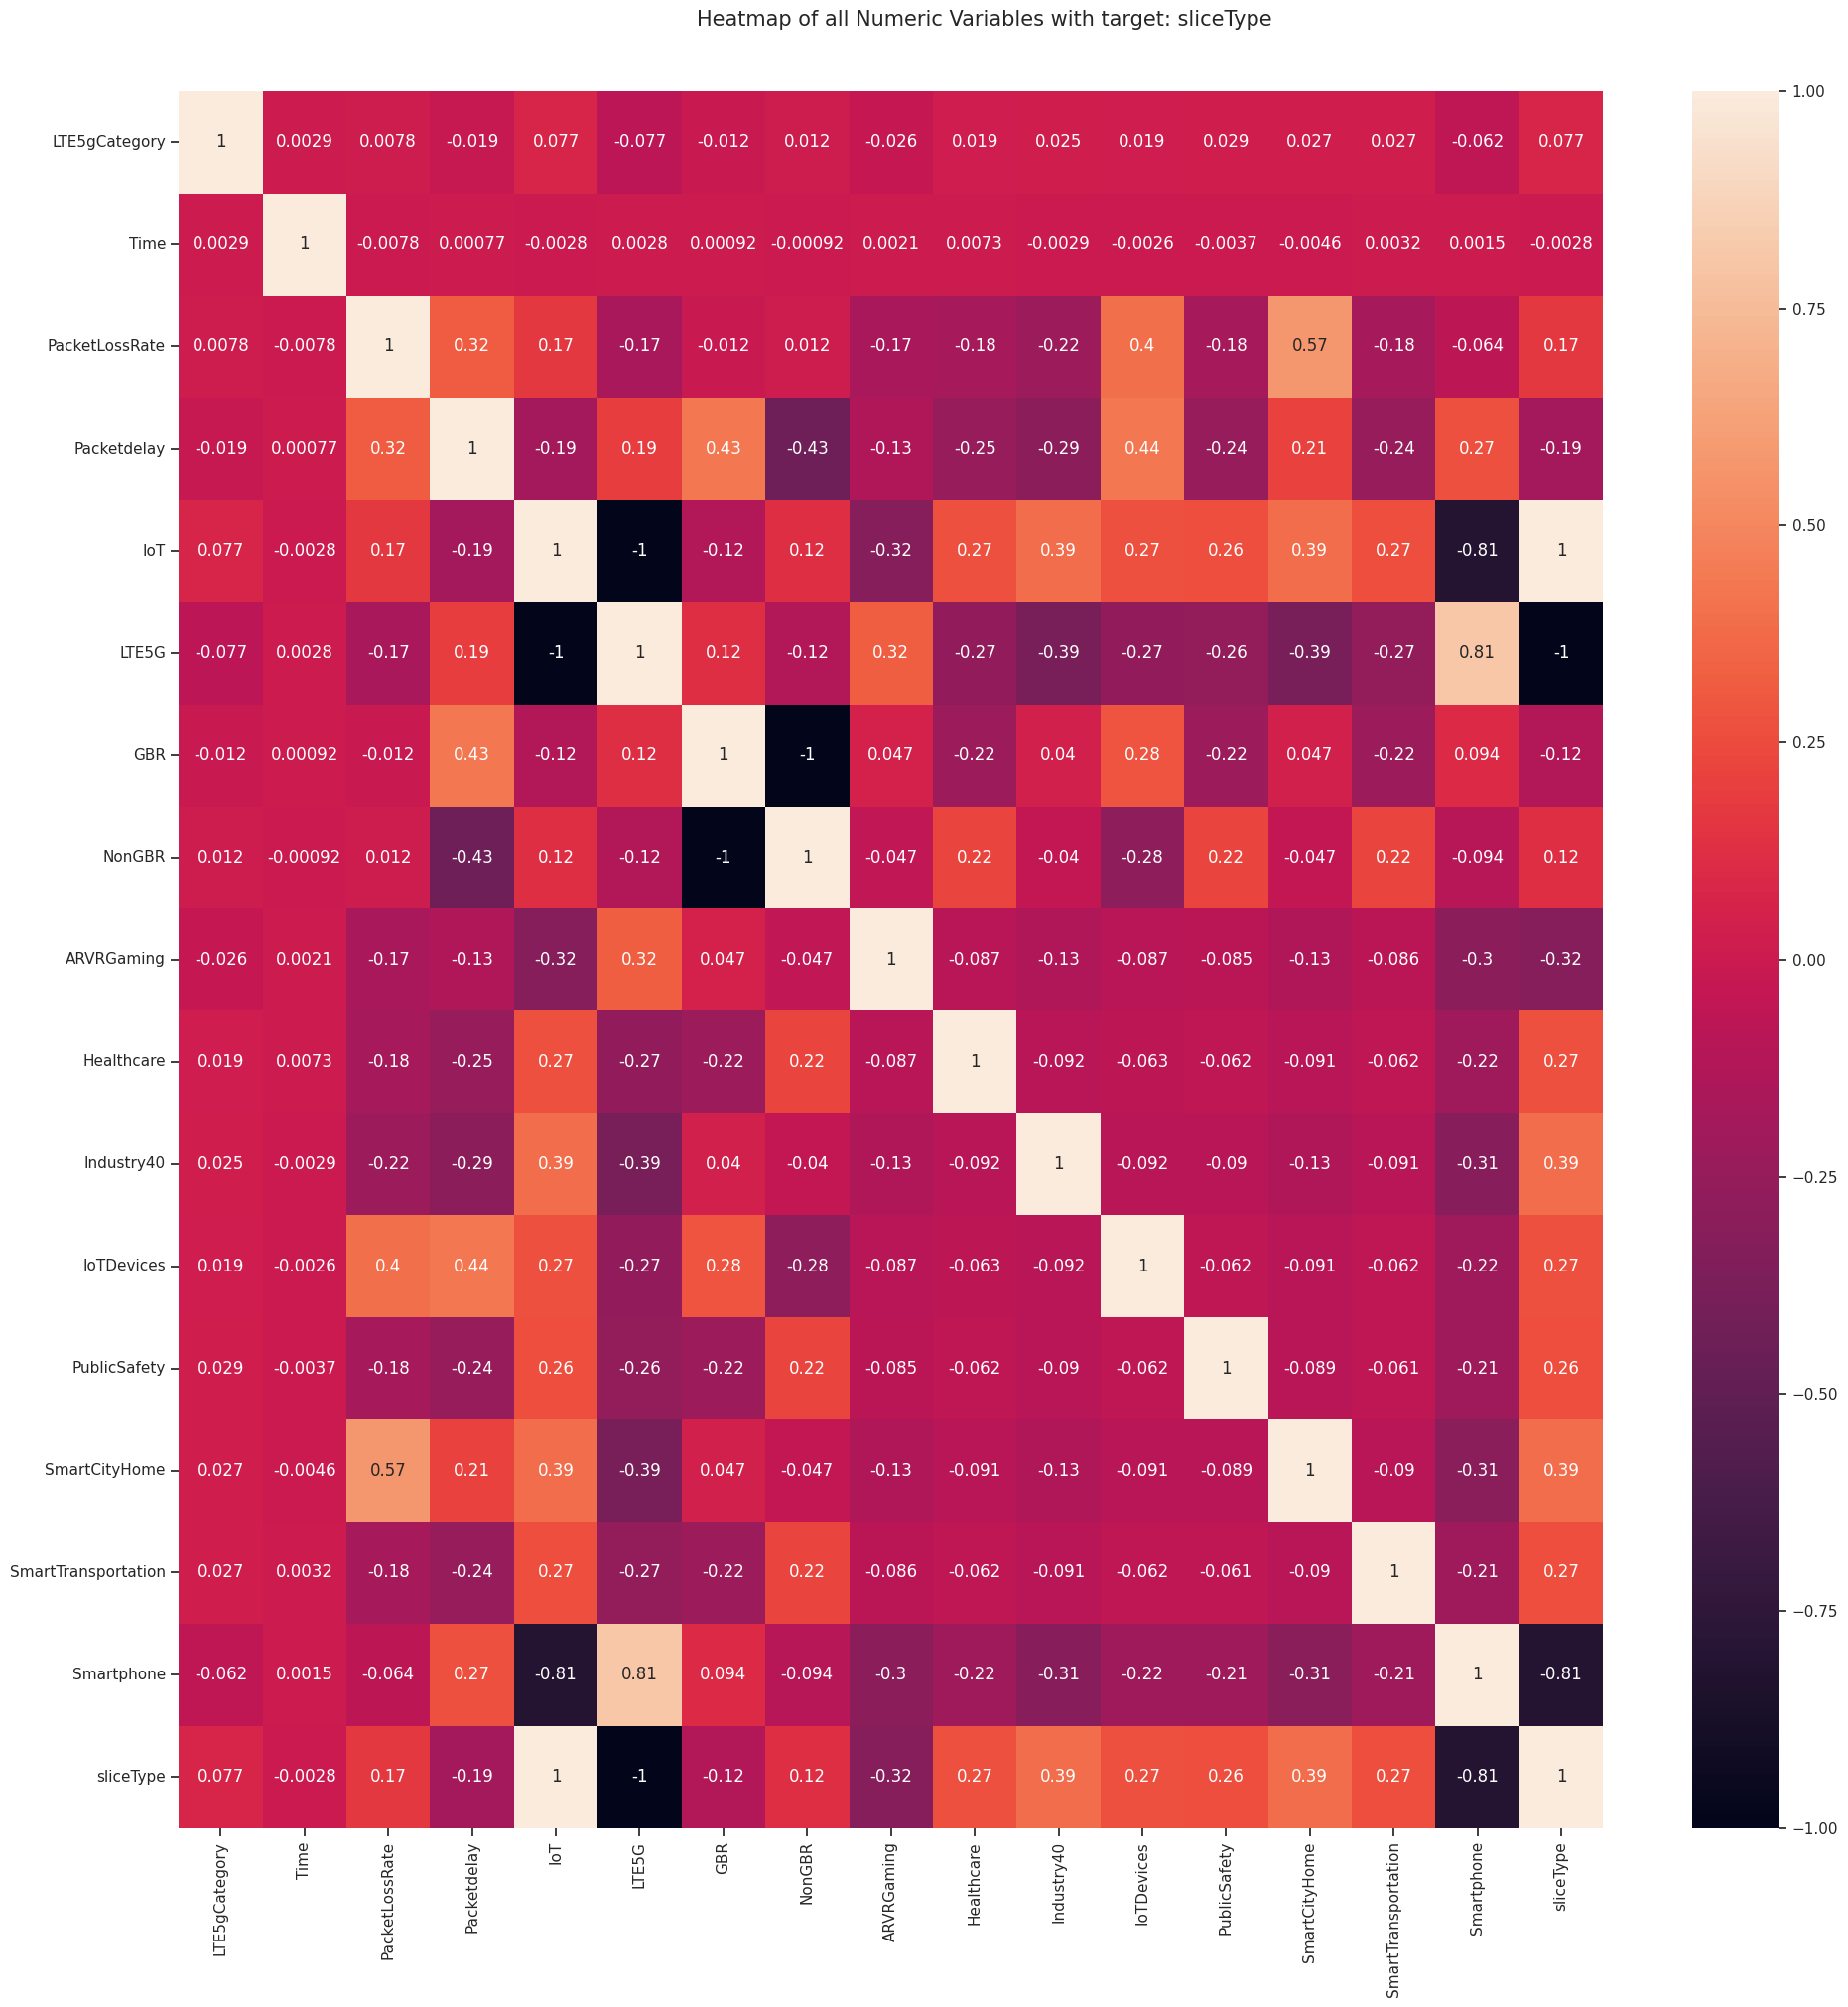

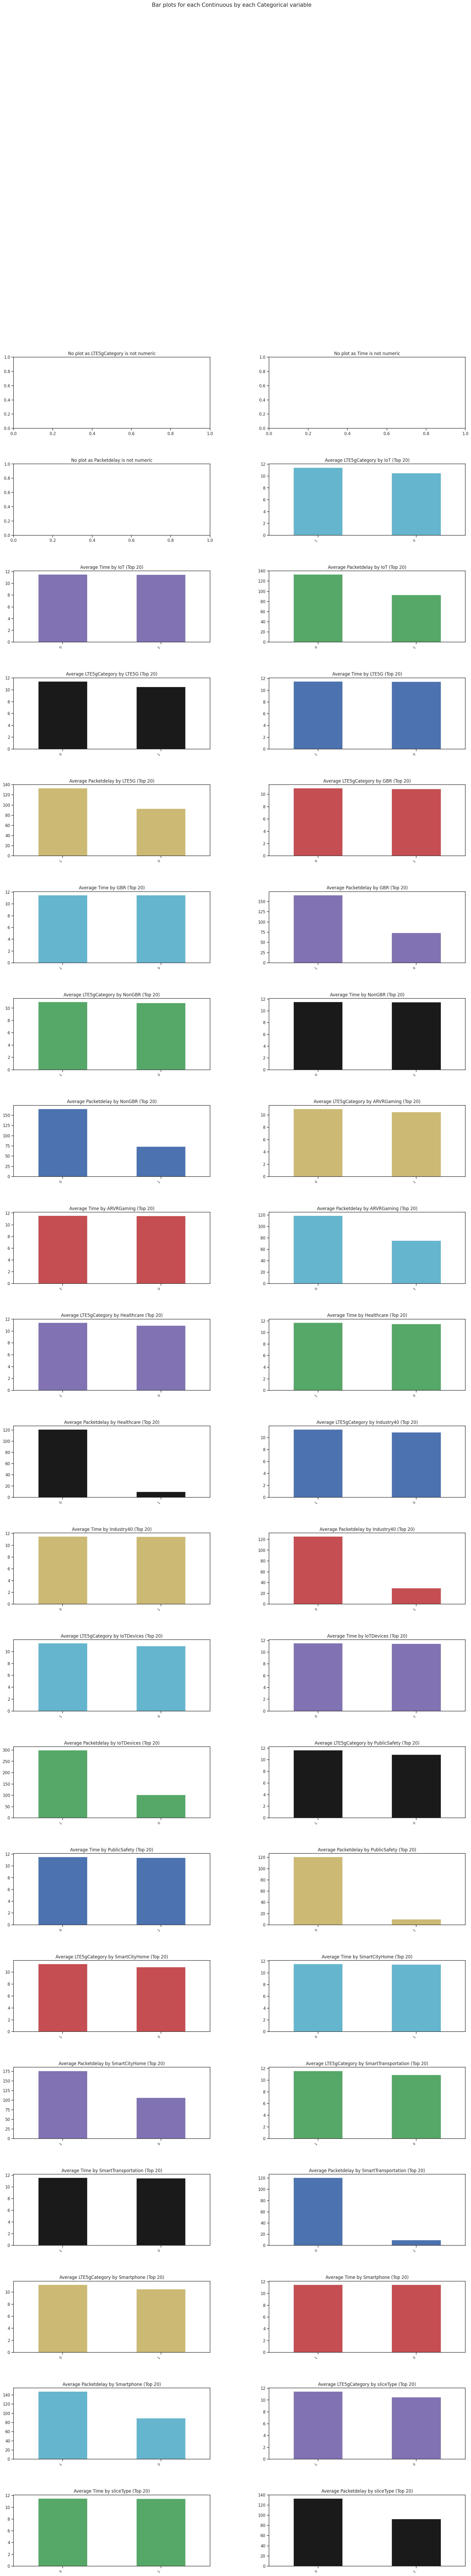

All Plots done
Time to run AutoViz = 22 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


,LTE5gCategory,Time,PacketLossRate,Packetdelay,IoT,LTE5G,GBR,NonGBR,ARVRGaming,Healthcare,Industry40,IoTDevices,PublicSafety,SmartCityHome,SmartTransportation,Smartphone,sliceType
13464,16,6,0.000001,60,0,1,1,0,0,0,0,0,0,0,0,1,0
18,13,22,0.000001,300,0,1,0,1,0,0,0,0,0,0,0,1,0
17367,17,3,0.000001,60,0,1,1,0,0,0,0,0,0,0,0,1,0
22773,14,19,0.000001,10,1,0,0,1,0,1,0,0,0,0,0,0,1
27180,12,18,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,17,18,0.000001,10,1,0,0,1,0,0,1,0,0,0,0,0,1
19648,8,23,0.001000,100,0,1,1,0,0,0,0,0,0,0,0,1,0
9845,12,19,0.001000,100,0,1,1,0,0,0,0,0,0,0,0,1,0
10799,2,4,0.000001,10,1,0,0,1,0,0,1,0,0,0,0,0,1


In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline
AV = AutoViz_Class()
AV.AutoViz(filename='',dfte=df,depVar='sliceType',verbose=1,max_rows_analyzed=df.shape[0]
               ,max_cols_analyzed=df.shape[1])